In [6]:
# --- STEP 2: Combine CSVs and preprocess ---
import pandas as pd
import glob

# Load all labeled CSVs
files = glob.glob("*.csv")
print("Found files:", files)

df_list = [pd.read_csv(f) for f in files]
data = pd.concat(df_list, ignore_index=True)

# Drop timestamp, keep only sensor + label
X = data[['ax','ay','az','gx','gy','gz']]
y = data['label']

print("Total samples:", len(X))
print("Unique labels:", y.unique())

# Normalize (optional but recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Found files: ['medium_20251009_111605.csv', 'slow_20251009_111202.csv', 'fast_20251009_112335.csv', 'left_20251009_112805.csv', 'right_20251009_113219.csv', 'fast_20251009_112324.csv', 'idle_20251009_110714.csv', 'medium_20251009_111443.csv', 'right_20251009_113155.csv', 'slow_20251009_111005.csv', 'medium_20251009_111532.csv', 'fast_20251009_112303.csv', 'slow_20251009_111151.csv', 'fast_20251009_111759.csv', 'medium_20251009_111429.csv', 'right_20251009_113044.csv', 'left_20251009_112958.csv', 'medium_20251009_111401.csv', 'fast_20251009_111809.csv', 'slow_20251009_110833.csv', 'right_20251009_113118.csv', 'fast_20251009_112253.csv', 'idle_20251009_110638.csv', 'idle_20251009_110751.csv', 'right_20251009_113307.csv', 'left_20251009_112826.csv', 'left_20251009_113008.csv', 'idle_20251009_110730.csv', 'fast_20251009_111747.csv', 'medium_20251009_111456.csv', 'medium_20251009_111634.csv', 'right_20251009_113032.csv', 'fast_20251009_112313.csv', 'right_20251009_113241.csv', 'left_2025100

In [3]:
pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 1.6 MB/s eta 0:00:00m eta 0:00:010:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 24.5 MB/s eta 0:00:00
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
# --- STEP 3: Train model ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Model Performance:\n")
print(classification_report(y_test, y_pred))


Model Performance:

              precision    recall  f1-score   support

        fast       0.94      0.91      0.93       166
        idle       0.97      1.00      0.98       228
        left       0.95      0.87      0.91       166
      medium       0.89      0.92      0.91       166
       right       0.95      0.96      0.95       167
        slow       0.89      0.92      0.91       166

    accuracy                           0.93      1059
   macro avg       0.93      0.93      0.93      1059
weighted avg       0.93      0.93      0.93      1059



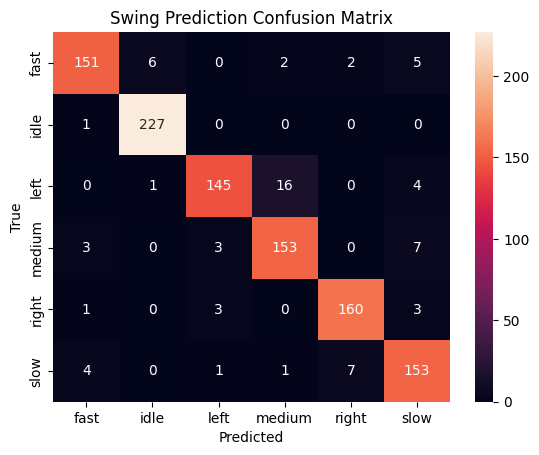

✅ Model and scaler saved.


In [8]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Swing Prediction Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Save model + scaler
joblib.dump(clf, "swing_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved.")


In [4]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.3 MB/s eta 0:00:003.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
